## 2.1.1 -  Implement K-means clustering from scratch

In [63]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("flower.jpg", cv2.COLOR_BGR2RGB)
img = np.float32(img)

def compute_mean(cluster, height, k):
    """
    Computes the mean (centers) of k clusters 
    -----
    args cluster: the array of cluster values
    args height: size of original data
    args k: number of clusters
    """
    sums = np.zeros((2,2))
    centers = np.zeros((k,2))
    count_0 = 0
    count_1 = 0
    for i in range(height):
        if(cluster[i] == 0):
            sums[0][0] += data[i][0] 
            sums[0][1] += data[i][1]
            count_0 += 1
        else:
            sums[1][0] += data[i][0] 
            sums[1][1] += data[i][1]
            count_1 += 1

    centers[0][0] = sums[0][0] / count_0
    centers[0][1] = sums[0][1] / count_0
    centers[1][0] = sums[1][0] / count_1
    centers[1][1] = sums[1][1] / count_1
    
    return centers

def k_means(img, k, iter_n):
    """
    Segments the image
    -----
    args img: image to be segmented
    args k: number of clusters
    args iter: iteration numbers
    """
    height, width, ch = img.shape
    
    # 1. Randomly select K centers
    # We do this by create a random array of RGB or GRAY values for each K 
    centers = np.random.random_sample((k, ch))*255
    
    cluster_iter = []
    for i in range(iter_n):
        # 2. Assign each point to the nearest cluster
        # Arr shape = (K, height, width), where K is cluster group
        clusters = calc_distance(img, centers)
        cluster_iter.append(clusters)
        
        # 3. Compute new mean for each cluster 
        new_centers = np.empty(shape=(k, ch))
        for j in range(k):
            np.mean(img[clusters[0]==j], axis=0, out=new_centers[j])
            
        # If new centers and centers are the same, exit iteration
        if((centers == new_centers).all()):
            break
        else:
            centers = new_centers
            
    return cluster_iter
    
def calc_distance(points, centers):
    """
    Calculates the eucilidean distance between points and center
    -----
    args points: the points 
    args centers: the centers of the distributions
    """
    dists = []
    # Calculate the distance between each point and each center
    for center in centers:
        dists.append([points - center])
    dists = np.linalg.norm(dists, axis=-1)
    
    # Return closest center of each point
    return np.argmin(dists, axis=0)

def euclidian_distance(center, point):
    """
    Calculates the eucilidean distance between points and center
    -----
    args points: the points 
    args centers: the centers of the distributions
    """
    # Calculate the distance between each point and each center
    return np.linalg.norm(point - center, axis=1)

def show_plot(imgs, cols=3, isGray = False):  
    arr = [131, 132, 133]
    
    j=0
    for i in range(len(imgs)):
        if(i%3==0):
            plt.figure(figsize=(10,10))
            j=0
        plt.subplot(arr[j])
        plt.xticks([]), plt.yticks([])
        plt.imshow(imgs[i])
        j+=1
        if(i!=len(imgs)-1):
            plt.title("Iteration number: "+str(i))
            
    plt.title("Final Iteration")    
    plt.show()
       
def show_figures(imgs, isGray = False, isEM = False):
    """
    Plots figures in groups of three
    -----
    args imgs: array of images to be shown
    args isGray: if cmap = gray or not, defaulted to false
    """
    length = len(imgs)
    arr = [131, 132, 133]
    
    j=0
    for i in range(len(imgs)):
        if(i%3==0):
            plt.figure(figsize=(10,10))
            j=0
        plt.subplot(arr[j])
        plt.xticks([]), plt.yticks([])
        
        if(not isEM and isGray):
            plt.imshow(imgs[i][0].astype(np.uint8), cmap='gray')
        elif(not isEM):
            plt.imshow(imgs[i][0].astype(np.uint8))
        elif(isGray):
            plt.imshow(imgs[i].astype(np.uint8),  cmap='gray')
        else:
            plt.imshow(imgs[i][0].astype(np.uint8))
        
        j+=1
        if(i!=len(imgs)-1):
            plt.title("Iteration number: "+str(i))
            
    plt.title("Final Iteration")    
    plt.show()

def k_means_2(img, k, iter_n):
    """
    Segments the image, used for color (not grayscale)
    -----
    args img: image to be segmented
    args k: number of clusters
    args iter: iteration numbers
    """
    w, h, ch = img.shape

    # Get image data points
    data_pts = img.reshape((w*h,ch))
    data_pts = np.float32(data_pts)
    
     # 1. Randomly select K centers
    # We do this by create a random array of RGB or GRAY values for each K 
    center = data_pts[np.random.randint(data_pts.shape[0], size=k)]
    
    # 2. Assign each point to the nearest cluster
    vect = np.zeros(data_pts.shape[0], dtype=np.float64)
    dist = np.zeros([data_pts.shape[0], k], dtype=np.float64)
   
    cluster_iter = []
    l=0
    for i in range(iter_n):
        for i, j in enumerate(center):
            # Calculate distance
            # Assign each point to nearest cluster by calculating its distance to each center
            dist[:, i] = euclidian_distance(j, data_pts)

        # 3. Compute new mean for each cluster 
        min_dist = np.argmin(dist, axis=1)
    

        # Adjust center of each cluster
        for c in range(k):
            center[c] = np.mean(data_pts[min_dist == c], 0)
        
        # Store first 5 iterations
        center_temp = np.uint8(center)
        cluster_tmp = center_temp[min_dist.flatten()]
        if(ch>1):
            cluster_tmp = cluster_tmp.reshape((w, h, ch))
        else:
            cluster_tmp = cluster_tmp.reshape((w, h))
        cluster_iter.append(cluster_tmp)

    # convert back to int
    center = np.uint8(center)
    
    # get clusters
    cluster = center[min_dist.flatten()]
    if(ch==1):
        cluster = cluster.reshape((w, h))
    else:
        cluster = cluster.reshape((w, h, ch))


    return cluster_iter

def euclidian_distance(center, point):
    """
    Calculates the eucilidean distance between points and center
    -----
    args points: the points 
    args centers: the centers of the distributions
    """
    # Calculate the distance between each point and each center
    return np.linalg.norm(point - center, axis=1)

def show_plot(imgs, cols=3, isGray = False):  
    arr = [131, 132, 133]
    j=0
    for i in range(len(imgs)):
        if(i%3==0):
            plt.figure(figsize=(10,10))
            j=0
        plt.subplot(arr[j])
        plt.xticks([]), plt.yticks([])
        plt.imshow(imgs[i])
        j+=1
        if(i!=len(imgs)-1):
            plt.title("Iteration number: "+str(i))
            
    plt.title("Final Iteration")    
    plt.show()

### 2.1.1 - Applying K-means with K=2

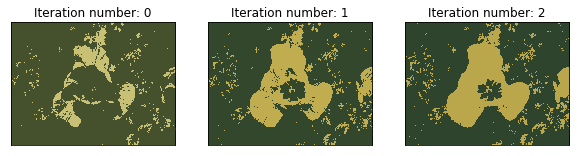

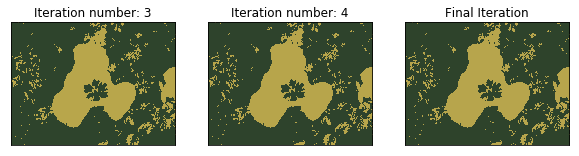

In [25]:
img = cv2.imread('flower.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
clusters = k_means_2(img, k=2, iter_n=6)

show_plot(clusters)

### 2.1.1 - Applying K-means with K=3

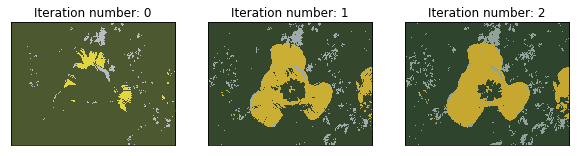

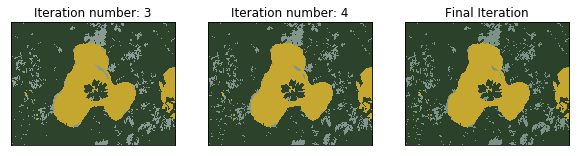

In [44]:
img = cv2.imread('flower.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
clusters = k_means_2(img, k=3, iter_n=6)

show_plot(clusters)

### 2.1.1 - Applying K-means with grayscale and K=2

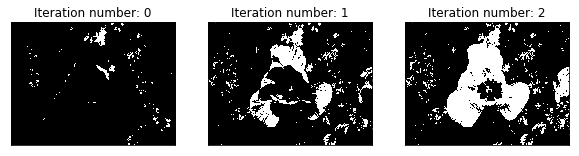

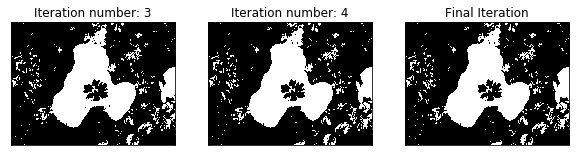

In [69]:
img_gray = cv2.imread("flower.jpg", cv2.COLOR_BGR2GRAY)
img_gray = np.float32(img)
clusters = k_means(img_gray, 2, 6)
show_figures(clusters, isGray = True)

### 2.1.1 - Applying K-means with grayscale and K=3

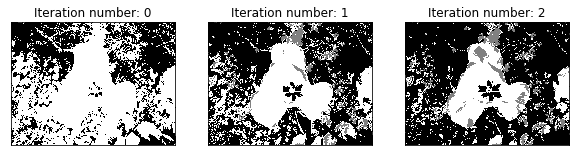

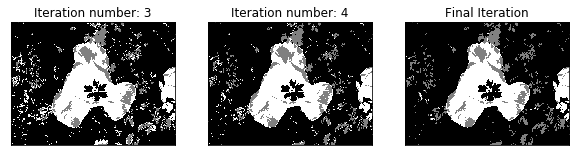

In [88]:
img_gray = cv2.imread("flower.jpg", cv2.COLOR_BGR2GRAY)
img_gray = np.float32(img)
clusters = k_means(img_gray, 3, 6)
show_figures(clusters, isGray = True)

### 2.1.1 - Comparing segmenetation for color and gray-scale

TODO : compare Color vs Gray scale


## 2.1.2 -  Implement EM-means clustering from scratch

In [ ]:
import math

# prob(Pt | cluster i ) : Probability Density Function (PDF)
def prob_cluster(pixel, cent, std):
    """
    Calculate the probability of association between a point and a
    given Gaussian Distribution for each channel in a pixel.
    -----
    args pixel: the pixel. 
    args cent: the center of the Gaussian distribution. 
    args std: standard deviation OF Gaussian distribution. 
    -----
    returns: PDF of each gaussian K for one pixel. 
    """
    gauss_pdf = []
    for i in range(len(std)):
        point_pdf = []
        for j in range(len(pixel)):
            temp = 1/((math.sqrt(2*math.pi))*std[i][j]) * math.e**(-.5*math.pow((pixel[j]-cent[i][j])/std[i][j],2))
            point_pdf.append(temp)
        gauss_pdf.append(np.linalg.norm(point_pdf, axis=-1))  
    return gauss_pdf

def em(img, k, iterations=10):
    """
    Performs Expectation Maximization (EM) algorithm of an image 
    -----
    args img: the input image
    args k: the number of Gaussian Distributions
    args iterations: the number of iterations 
    -----
    """
    h, w, ch = img.shape
    
    if(k==1):
        raise Exception('K cannot be 1') 
    
    # Randomly define a center for each K Gaussian components
    # This center will be the randomly initialized peak for the initial gaussian
    gaus_peak = np.random.random((k, ch)) * 10.0
    
    # Probability that a point is in a given gaussian K
    prob = np.full(k, (1.0/k))
    # STD of a point being in a given gaussian K
    std_gaus = np.full((k, ch), (255.0/k))

    iter_pdf = []
    for iter in range(iterations):
        # E-Step
        # Assign each point a probability of being in each K Gaussian
        pdf = np.empty(shape=(h, w, k))
        for row in range(h):
            for col in range(w):
                pdf[row][col] = prob_cluster(img[row][col], gaus_peak, std_gaus)
    
        # Normalize the distribution
        pixel_sum = np.sum(pdf * prob, axis=-1)
        pixel_sum = pixel_sum.reshape((h, w, 1))
        pdf = pdf / pixel_sum
    
        # Assign each pixel to a gaussian distribution
        cluster_groups = np.argmax(pdf, axis=-1)
        iter_pdf.append(cluster_groups)
        
        # M-Step
        # Recalculate the Gaussian Distributions with newly assigned points
        for distr in range(k):
            distr_sum = 0
            for i in range(h):
                for j in range(w):
                    distr_sum += pdf[i, j, distr] * img[i, j]
            
            gaus_peak[distr] = distr_sum / np.sum(pdf[:,:,distr])
            curr_cluster = img[cluster_groups==distr]
            std_gaus[distr] = np.sqrt(np.var(curr_cluster, axis=0))
            pdf[distr] = np.size(curr_cluster) / np.size(img)
    
    return iter_pdf

### 2.1.2 - Applying EM with K=2

In [ ]:
img = cv2.imread("flower.jpg", cv2.COLOR_BGR2RGB)
img = np.float32(img)

em_gaussian2 = em(img, k=2, iterations=6)
show_figures(em_gaussian2, isEM = True)

### 2.1.2- Applying EM with K=3

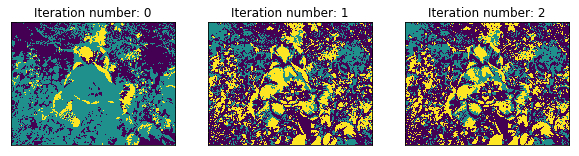

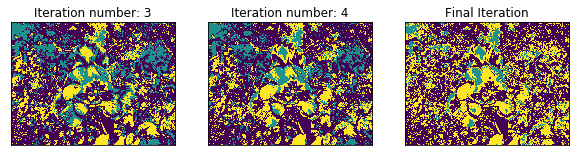

In [141]:
em_gaussian3 = em(img, k=3, iterations=6)
show_figures(em_gaussian3, isEM = True)

### 2.1.2 - Applying EM with Grayscale and K=2

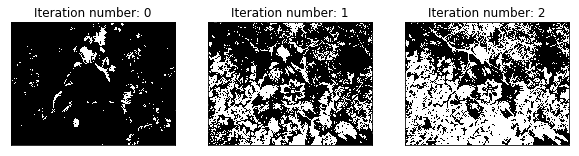

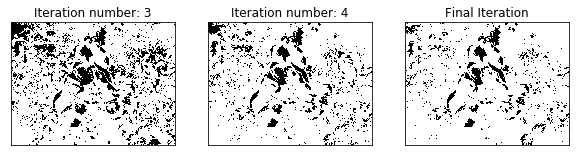

In [139]:
img_gray = cv2.imread("flower.jpg", cv2.COLOR_BGR2GRAY)
img_gray = np.float32(img_gray)

#em_gray_2 = em(img_gray, k=3, iterations=6)
show_figures(em_gray_2, isGray=True, isEM=True)

### 2.1.2 - Applying EM with Grayscale and K=3 

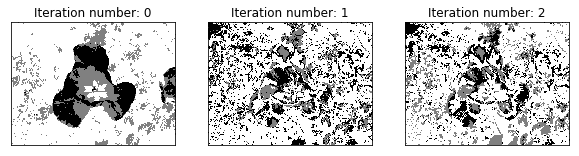

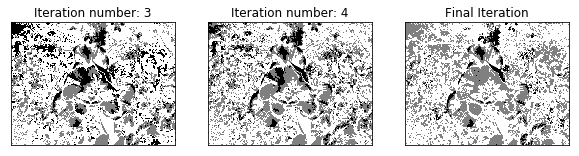

In [140]:
em_gray_3 = em(img_gray, k=3, iterations=6)
show_figures(em_gray_3, isGray=True, isEM=True)

### 2.1.2 - Comparing segmentation of color and gray-scale

// TODO

Comparing K-means and EM it can be seen that EM seperates the data much more signficantly as compared to K-means. This is because there is less overlapping between Gaussian distribution curves, thus the data can be better classified and seperated. Indeed, less overlapping leads to higher confidence and probability rate. 


# 2.1.3 - Cluster Random DataPoints with K-Means and GMM

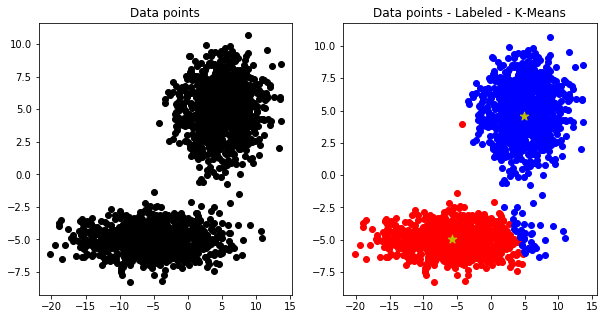

In [9]:
def k_means_data_points(data, k, iter_n):
    """
    Segments the image
    -----
    args img: image to be segmented
    args k: number of clusters
    args iter: iteration numbers
    """
    height, width = data.shape
    
    # 1. Randomly select K centers
    centers = np.random.random_sample((k, 2))*10

    cluster_iter = []
    for i in range(iter_n):
        # 2. Assign each point to the nearest cluster
        # Calculate distance between each point and each center
        distance = np.zeros((k, height))
        for i in range(0, height):
            for j in range(k):
                distance[j][i] = math.sqrt(
                    (centers[j][0] - data[i][0])**2 + (centers[j][1] - data[i][1])**2
                )

        # 2. Assign each point to the nearest cluster
        cluster = np.zeros(height)
        for i in range(len(distance[0])):
            if(distance[0][i] > distance[1][i]):
                cluster[i] = 0
            else:
                cluster[i] =1
        
        cluster_iter.append(cluster)

        # 3. and Compute new mean for each cluster 
        centers = compute_mean(cluster, height, k)

    return cluster_iter, centers

"""
Following code generates datapoints for question 1.1 part 3.
"""
data = np.float32(
    np.vstack((
        np.random.normal(
            loc = np.array([5,5]),
            scale = np.array([3,2]),
            size = (1000, 2)),
        np.random.normal(
            loc = np.array([-5, -5]),
            scale = np.array([5, 1]),
            size = (1000, 2)
        ))))

# Call K-Means with k=2 and iterations=5
k_means, centers = k_means_data_points(data, k=2, iter_n=5)
# Get the last iteration of K-meaqns
k_means = k_means[4]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(data[:,0], data[:,1],"ko")
plt.title("Data points")

plt.subplot(122)

red_x = []
red_y = []
blue_x = []
blue_y = []

for i in range(2000):
    if(k_means[i] == 0):
        red_x.append(data[i,0])
        red_y.append(data[i,1])
    elif(k_means[i] == 1):
        blue_x.append(data[i,0])
        blue_y.append(data[i,1]) 
    
plt.scatter(red_x, red_y, color='r')
plt.scatter(blue_x, blue_y, color='b')
plt.scatter((centers[0][0], centers[1][0]), (centers[0][1], centers[1][1]), s=80, color='y', marker='*')
plt.title("Data points - Labeled - K-Means")
plt.show()

DATA:
[[ 8.1015835  4.0725427]
 [-0.2529044  1.8203082]
 [ 1.4879776  3.5661635]
 ...
 [-7.745313  -3.9894524]
 [-1.7536191 -4.831211 ]
 [-8.958063  -4.2581306]]
********************
GAUS_PEAKS:
[[4.31489994 0.20922441]
 [4.48856583 3.97707017]]
********************
*************************
RETURN:
[1. 0. 1. ... 0. 0. 0.]


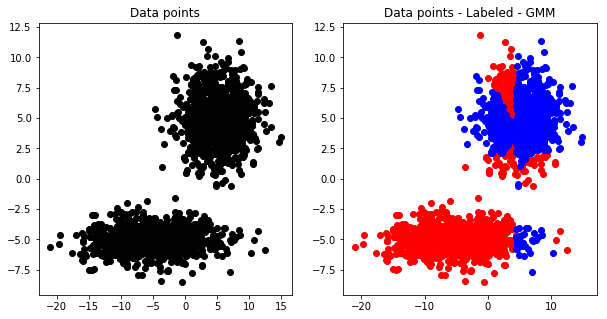

In [152]:
data = np.float32(
        np.vstack((
            np.random.normal(
                loc=np.array([5, 5]),
                scale=np.array([3, 2]),
                size = (1000, 2)),
            np.random.normal(
                loc=np.array([-5, -5]),
                scale=np.array([5, 1]),
                size = (1000, 2)
            ))))

print('DATA:')
print(data)
print('*'*20)

def prob_cluster(pixel, cent, std):
    """
    Calculate the probability of association between a point and a
    given Gaussian Distribution for each channel in a pixel.
    -----
    args pixel: the pixel. 
    args cent: the center of the Gaussian distribution. 
    args std: standard deviation OF Gaussian distribution. 
    -----
    returns: PDF of each gaussian K for one pixel. 
    """
    gauss_pdf = []
    # iterate over each gaussian distribution
    for i in range(len(std)):
        point_pdf = []
        # iterate over each point x,y
        for j in range(len(pixel)):
            temp = 1/((math.sqrt(2*math.pi))*std[i][j]) * math.e**(-.5*math.pow((pixel[j]-cent[i][j])/std[i][j],2))
            point_pdf.append(temp)
        gauss_pdf.append(np.linalg.norm(point_pdf, axis=0))  
    return gauss_pdf

def em(data, k, iterations=5):
    ch = 2
    h, w = data.shape

    # Randomly define a center for each K Gaussian components
    # This center will be the randomly initialized peak for the initial gaussian (x,y) for each K
    gaus_peak = np.random.random((k, ch)) * 5.0
    print('GAUS_PEAKS:')
    print(gaus_peak)
    print('*'*20)
    
    # Probability that a point is in a given gaussian K
    prob = np.full(k, (1.0 / k))
    # STD of each point (x,y) being in a given gaussian K
    std_gaus = np.full((k, ch), (1.0 / k))

    # E-Step
    # Assign each point a probability of being in each K Gaussian
    iter_pdf = []
    for iter in range(iterations):
        pdf = []
        for row in range(h):
            pdf.append(prob_cluster(data[row], gaus_peak, std_gaus))
        iter_pdf.append(pdf)

        # Assign each point to the nearest cluster
        cluster = np.zeros(h)
        for i in range(len(pdf)):
            if(pdf[i][0] > pdf[i][1]):
                cluster[i] = 0
            else:
                cluster[i] =1

        # M-Step
        # Recalculate the Gaussian Distributions with newly assigned points
        # PDF : 2,2000
        pdf_reshaped = np.reshape(pdf, (len(pdf),2))
        pdf_center_1 = pdf_reshaped[:,0]
        pdf_center_2 = pdf_reshaped[:,1]
        sums = np.zeros((2,2))
        counts = np.zeros(2)
        for i in range(h):
            #print('pdf ',pdf_center_1[distr])
            #print('data', data[i][distr])
            if(pdf_center_1[i] > pdf_center_2[i]):
                sums[0][0] += pdf_center_1[i]*data[i][0]
                sums[0][1] += pdf_center_1[i]*data[i][1]
                counts[0] += 1
            elif(pdf_center_1[i] < pdf_center_2[i]):
                sums[1][1] += pdf_center_2[i]*data[i][0]
                sums[0][1] += pdf_center_2[i]*data[i][1]
                counts[1] += 1

    gaus_peak[0][0] = sums[0][0] / counts[0]
    gaus_peak[0][1] = sums[0][1] / counts[0]
    gaus_peak[1][0] = sums[1][0] / counts[1]
    gaus_peak[1][1] = sums[1][1] / counts[1]

    return cluster
    

x = em(data, k=2, iterations=5)

print('*'*25)
print('RETURN:')
print(x)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(data[:,0], data[:,1],"ko")
plt.title("Data points")

plt.subplot(122)

red_x = []
red_y = []
blue_x = []
blue_y = []

for i in range(2000):
    if(x[i] == 0):
        red_x.append(data[i,0])
        red_y.append(data[i,1])
    elif(x[i] == 1):
        blue_x.append(data[i,0])
        blue_y.append(data[i,1]) 
    
plt.scatter(red_x, red_y, color='r')
plt.scatter(blue_x, blue_y, color='b')
#plt.scatter((centers[0][0], centers[1][0]), (centers[0][1], centers[1][1]), s=80, color='y', marker='*')
plt.title("Data points - Labeled - GMM")
plt.show()

# 2.2 - Normalized graph-cut and Mean-Shift segmentation

### 2.2.1 - Varying the parameters in Normalized graph-cut

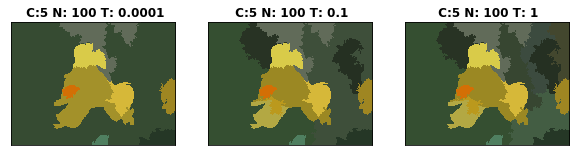

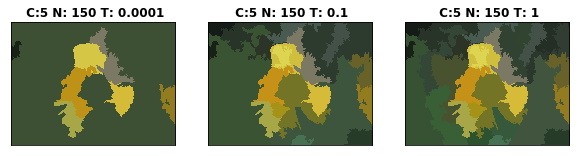

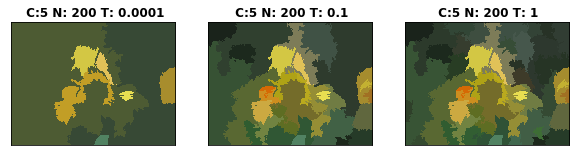

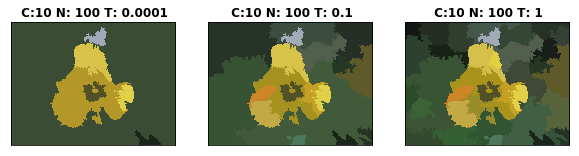

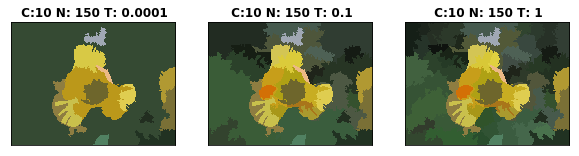

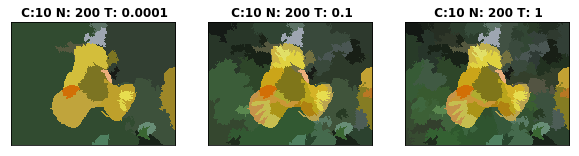

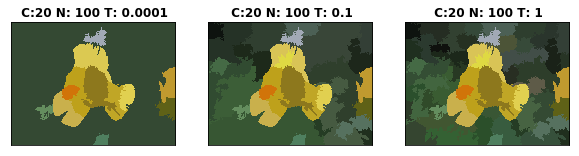

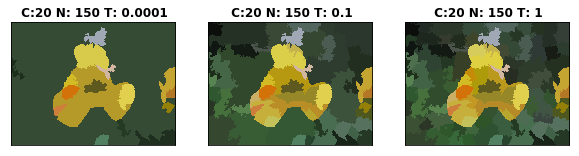

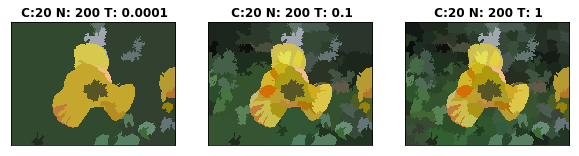

In [19]:
from skimage import segmentation, color
from skimage.future import graph
from skimage.segmentation import quickshift

# Slic function
comp = [5,10,20]
seg = [100,150,200]

# Cut_normalized function
thr =  [0.0001,0.1,1]

# Display in subplots of 3
sub_plots = [131, 132, 133]

sub = 0
for i in range(len(comp)):
    for j in range(len(seg)):
        for l in range(len(thr)):
            if(sub%3 == 0):
                plt.figure(figsize=(10,10))
                sub = 0
            labels = segmentation.slic(img, compactness=comp[i], n_segments=seg[j])
            g = graph.rag_mean_color(img, labels, mode='similarity')
            labels = graph.cut_normalized(labels, g, thresh=thr[l])
            out = color.label2rgb(labels, img, kind='avg')
            
            plt.subplot(sub_plots[sub])
            plt.imshow(out)
            plt.title(" C:"+str(comp[i])+" N:"+str(seg[j])+" T:"+str(thr[l]), fontweight="bold")
            plt.xticks([]), plt.yticks([])
            sub+=1
plt.show()

## Discussing the Trends

As can be seen from above:
- Increasing Compactness : Results in super pixel shapes being more square / cubic looking. This is due to compactness balancing color and space proximity.
- Increasing N_Segments : Results in more labels in the segmented output image. 
- Increasing Threshold: Results in a larger number of subdivisions which pixels are grouped in. Thus a higher threshold results in a more "defined" image with more  super pixel groups  whereas a lower threshold results in a less defined image with less groups.

### 2.2.2 - Varying parameters of mean-shift

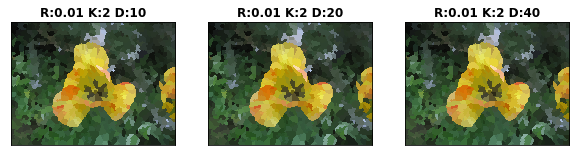

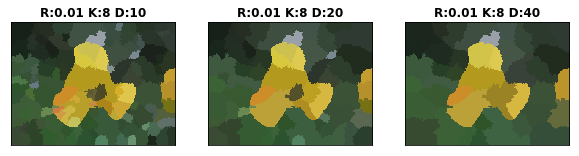

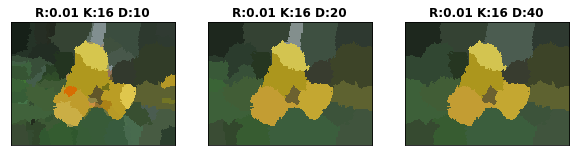

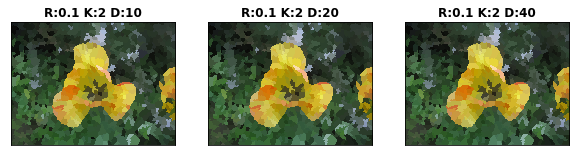

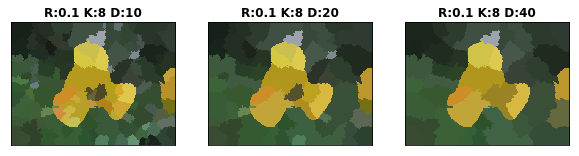

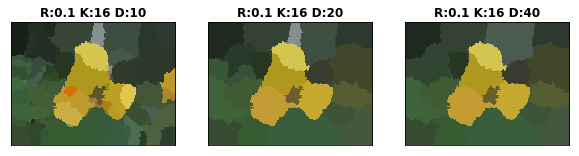

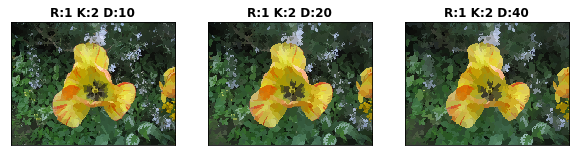

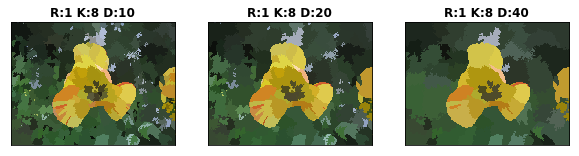

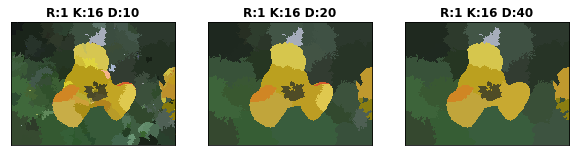

In [7]:
img = cv2.cvtColor(cv2.imread('flower.jpg'), cv2.COLOR_BGR2RGB)

# Display in subplots of 3
sub_plots = [131, 132, 133]

r = [0.01,0.1,1]
k_size = [2,8,16]
m_dis = [10,20,40]

counter = 0
for i in range(len(r)):
    for k in range(len(k_size)):
        for j in range(len(m_dis)):
            if(counter%3 == 0):
                counter = 0
                plt.figure(figsize=(10,10))
                
            label = quickshift(img, 
                               ratio=r[i], 
                               kernel_size=k_size[k],
                               max_dist = m_dis[j])
            out = color.label2rgb(label, img, kind='avg')
            
            plt.subplot(sub_plots[counter])
            plt.imshow(out)
            plt.title("R:"+str(r[i])+
                      " K:"+str(k_size[k])+
                      " D:"+str(m_dis[j]), fontweight="bold")
            plt.xticks([]), plt.yticks([])
            counter+=1
plt.show()

## Discussing the Trends

As can be seen from above:
- Increasing Ratio: Increasing the ratio results in super pixel shapes being more square / cubic looking. This is due to compactness balancing color and space proximity.
- Increasing Kernel Size: Increasing the kernel size results in fewer clusters, this is because the kernel size represents the width used in the gaussian smothing.
- Increasing Max Distribution: Increasing the maximum distribution results in fewer clusters, this is because the maximum distribution represents the cut off point for data distances.